In [31]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
import soundfile as sf
from IPython.display import Audio

# IIR Hilbert Transform 
https://dsp.stackexchange.com/questions/37411/iir-hilbert-transformer

In [32]:
c0 = np.array([0.47944111608296202665,0.87624358989504858020,0.97660296916871658368,0.99749940412203375040], dtype=np.float64)
c1 = np.array([0.16177741706363166219,0.73306690130335572242,0.94536301966806279840,0.99060051416704042460], dtype=np.float64)

In [96]:
def stage(x, c):
    y = np.zeros_like(x)
    for i in range(x.shape[-1]):
        y2 = y[...,i-2] if i>1 else y[...,-1]
        x2 = x[...,i-2] if i>1 else y[...,-1]
        y[...,i] = c * (x[...,i] + y2) - x2
    return y

def cascade(x, cs):
    y = x
    for c in cs:
        y = stage(y, c)
    return y

In [133]:
x, sr = sf.read('/Users/victor/Music/sample/de720/30.wav')
x = x[:96000]
x.std()

0.06942495892291932

In [368]:
sr = 44100
xf = 600
# x = np.random.randn(sr)
x = np.sin(np.arange(sr)/sr * xf * 2 * np.pi)
x = np.sin(2*np.pi*x)

In [369]:
Audio(x, rate=sr)

In [370]:
xr = cascade(x, c0)[:-1]
y = cascade(x, c1)[1:]

In [371]:
mf = 200
mphi = np.arange(xr.shape[-1])/sr * mf * 2 * np.pi
m0 = np.cos(mphi)
m1 = np.sin(mphi)

z = m0*xr + m1*y

In [372]:
xr.shape, y.shape

((44099,), (44099,))

0.6489875524670349

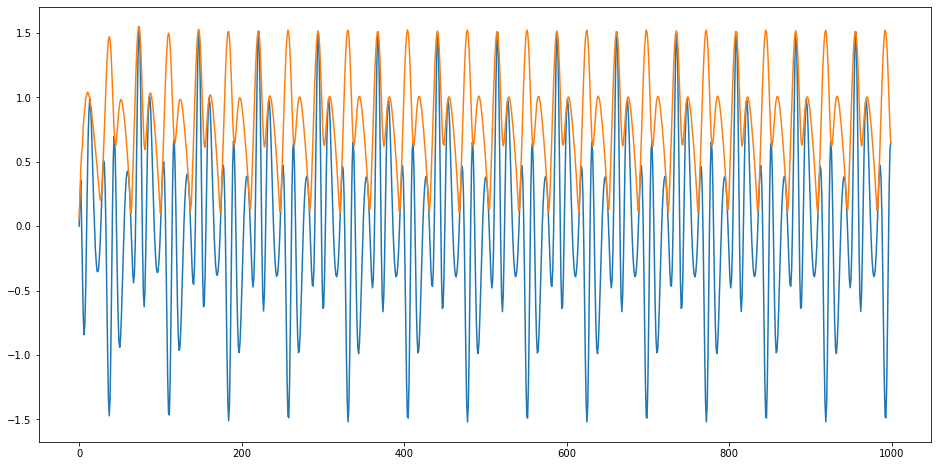

In [373]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

n = 1000
# ax.plot(y[:n])
ax.plot(xr[:n])
ax.plot((xr**2+y**2)[:n]**0.5)
# ax.plot(z[:n])

y.std()

In [374]:
Audio(xr, rate=sr)

In [375]:
Audio(y, rate=sr)

In [376]:
Audio(np.stack((xr,y), 0), rate=sr)

In [377]:
Audio(z, rate=sr)

In [378]:
Audio(np.stack((xr,z), 0), rate=sr)

In [379]:
w = 0.5-0.5*np.cos(np.linspace(0,1,z.shape[-1])*2*np.pi)

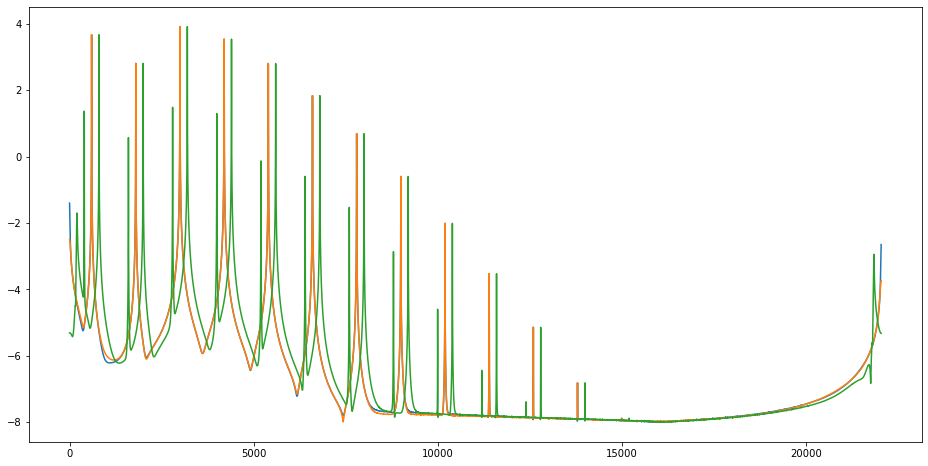

In [380]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
X = np.fft.rfft(w*xr)
Y = np.fft.rfft(w*y)
Z = np.fft.rfft(w*z)
ax.plot(np.log10(1e-8+np.abs(X)))
ax.plot(np.log10(1e-8+np.abs(Y)))
ax.plot(np.log10(1e-8+np.abs(Z)))

## Quadrature Oscillator

In [487]:
n = 100000
x = np.array(1.+0j, dtype=np.complex64)
phis = np.pi*np.linspace(0.001, 0.5, n)
zs = np.cos(phis) + 1j*np.sin(phis)
xs = []
for z in zs:
    xs.append(x.item())
#     x *= z
    x *= z * (1.01-.01*x*np.conj(x))
#     x *= z * (1+(1-x*np.conj(x))*1e-2)
x = np.array(xs)

In [488]:
x.dtype, np.max(np.abs(x))

(dtype('complex128'), 1.000000365465097)

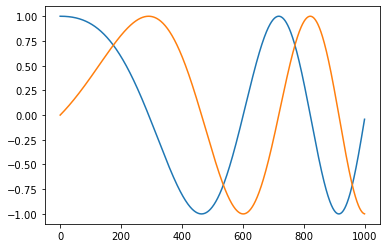

In [489]:
plt.plot(np.real(x)[:1000])
plt.plot(np.imag(x)[:1000])

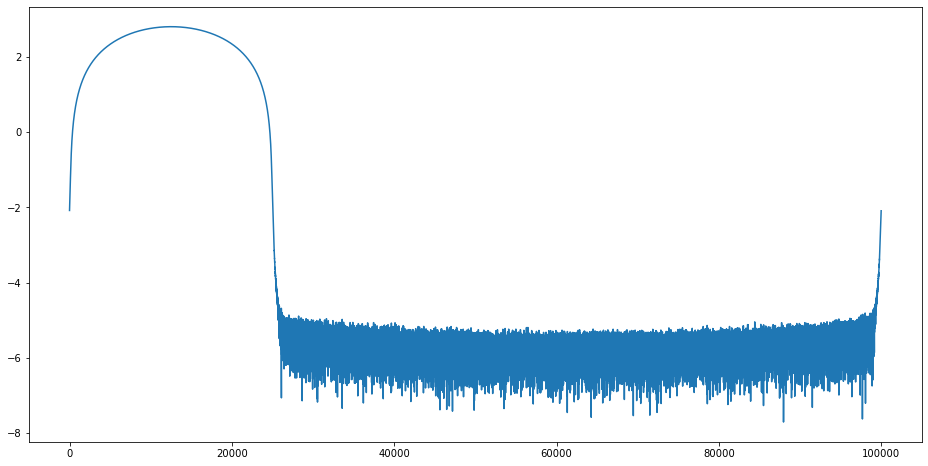

In [490]:
w = 0.5-0.5*np.cos(np.linspace(0,1,x.shape[-1])*2*np.pi)

fig, ax = plt.subplots(1,1,figsize=(16,8))
X = np.fft.fft(w*x)
ax.plot(np.log10(1e-8+np.abs(X)))